# Students Social Media Addiction Predictor

Phase 1: 
Goal: Load raw data, understand it, and clean it to build the model.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("dataset\Students Social Media Addiction.csv")

In [3]:
data.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
data.isna().sum()

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

Conclusion: There are no N/A or any duplicated values present in this data

<Axes: xlabel='Age,Gender'>

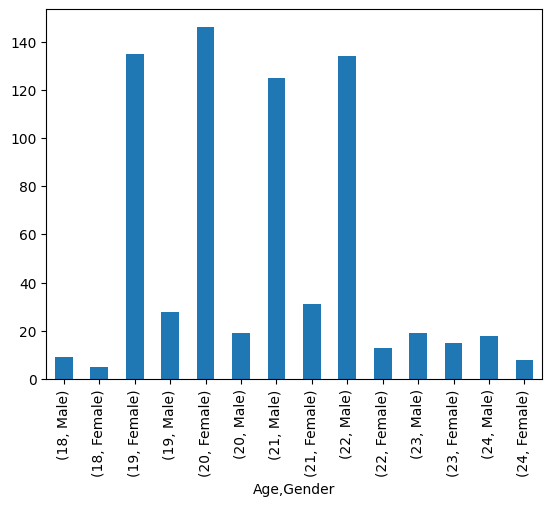

In [7]:
data.groupby("Age")["Gender"].value_counts().plot(kind = 'bar')

In [8]:
data.groupby("Mental_Health_Score")["Gender"].value_counts()

Mental_Health_Score  Gender
4                    Female     21
                     Male        8
5                    Female     94
                     Male       79
6                    Male      121
                     Female     98
7                    Male       96
                     Female     82
8                    Female     58
                     Male       47
9                    Male        1
Name: count, dtype: int64

In [9]:
data.groupby("Gender")[["Sleep_Hours_Per_Night","Age"]].median()

,Sleep_Hours_Per_Night,Age
Gender,,
Female,6.9,20.0
Male,6.9,21.0


In [10]:
data.columns

Index(['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country',
       'Avg_Daily_Usage_Hours', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')

In [11]:
data.shape

(705, 13)

In [12]:
print(f"No of unique countries: {data["Country"].nunique()}")

No of unique countries: 110


In [13]:
columns_to_keep = ['Age', 'Gender', 'Academic_Level','Avg_Daily_Usage_Hours', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score']
columns_to_drop = ['Student_ID','Country']

In [14]:
data.drop(columns=columns_to_drop,inplace=True)

In [15]:
data.columns

Index(['Age', 'Gender', 'Academic_Level', 'Avg_Daily_Usage_Hours',
       'Most_Used_Platform', 'Affects_Academic_Performance',
       'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')

--- CORRELATION WITH ADDICTION SCORE ---
Addicted_Score                 1.000000
Conflicts_Over_Social_Media    0.933586
Avg_Daily_Usage_Hours          0.832000
Age                           -0.166396
Sleep_Hours_Per_Night         -0.764858
Mental_Health_Score           -0.945051
Name: Addicted_Score, dtype: float64


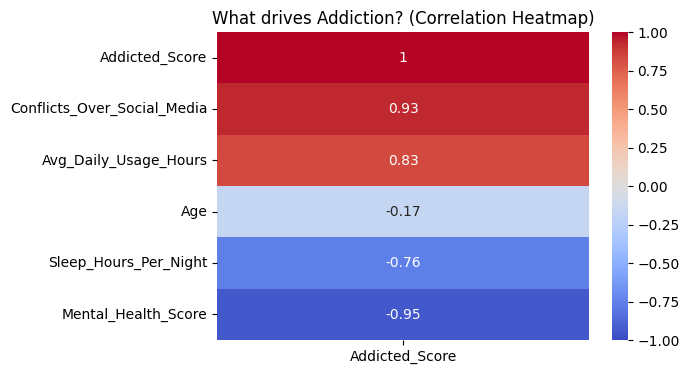

In [17]:
# ---------------------------------------------------------
# INSIGHT 1: Sleep vs. Addiction
# ---------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
# We only care about how numeric columns relate to 'Addicted_Score'
numeric_df = data.select_dtypes(include=['number']) 
correlation = numeric_df.corr()['Addicted_Score'].sort_values(ascending=False)

print("--- CORRELATION WITH ADDICTION SCORE ---")
print(correlation)

# Visual Proof: Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(numeric_df.corr()[['Addicted_Score']].sort_values(by='Addicted_Score', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("What drives Addiction? (Correlation Heatmap)")
plt.show()

--- AVERAGE ADDICTION SCORE BY PLATFORM ---
   Most_Used_Platform  Addicted_Score
0            WhatsApp        7.462963
1            Snapchat        7.461538
2              TikTok        7.428571
3           Instagram        6.554217
4             YouTube        6.100000
5              WeChat        6.066667
6           KakaoTalk        6.000000
7            Facebook        5.666667
8             Twitter        5.500000
9           VKontakte        5.000000
10           LinkedIn        3.809524
11               LINE        3.000000


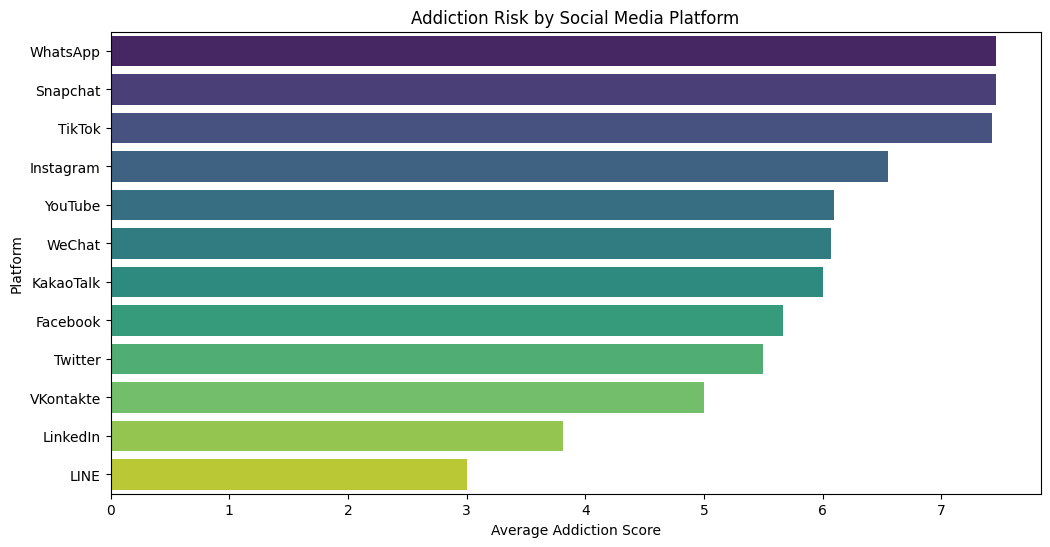

In [18]:
# ---------------------------------------------------------
# INSIGHT 2: Which App is the Most Addictive?
# ---------------------------------------------------------

# Group by Platform and calculate the average Addiction Score
platform_impact = data.groupby('Most_Used_Platform')['Addicted_Score'].mean().sort_values(ascending=False).reset_index()

print("--- AVERAGE ADDICTION SCORE BY PLATFORM ---")
print(platform_impact)

# Visual Proof: Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Addicted_Score', y='Most_Used_Platform', data=platform_impact, palette='viridis')
plt.title("Addiction Risk by Social Media Platform")
plt.xlabel("Average Addiction Score")
plt.ylabel("Platform")
plt.show()

In [ ]:
data.to_csv("Cleaned_Dataset.csv",index = False)